# Literature Analyses

This notebook analyses the collected and curated literature data for the aperiodic-clinical project. 

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from lisc.plts.words import plot_years

In [2]:
import seaborn as sns
sns.set_context('paper')

## Functions

In [38]:
def plot_hist(df, column, figsize=(3, 3), **kwargs):
    """Helper function to plot a histogram of data."""
    
    # Settings
    color = None
    shrink = 0.8
    
    plt.figure(figsize=figsize)
    hist = sns.histplot(df, x=column, shrink=shrink, color=color, **kwargs)
    hist.set_xticks(hist.get_xticks())  
    hist.set_xticklabels(hist.get_xticklabels(), rotation=45, ha='right');

## Load the Data

In [40]:
# Set the file name
file_name = 'apc_data.csv'

In [41]:
# Load the data
df = pd.read_csv(file_name, skiprows=[0])

In [6]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Settings Reporting', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding', 'Report Effects Size',
       'Effect Size Measure', 'Effects Size', 'Biomarker', 'Interpretation',
       'Notes'],
      dtype='object')

#### Clean up the loaded data

In [7]:
# Drop the null rows
df = df.dropna()

In [8]:
df.head()

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ exponent in clinical group,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...
2,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ exponent in clinical group ⬆︎ exponent with...,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...
3,ADHD,Ostlund et al,2021,4,10.1016/j.dcn.2021.100931,Behavioral and cognitive correlates of the ape...,Developmental Cognitive Neuroscience,EEG,resting,8m,...,no,unclear,unclear,⬇︎ exponent in clinical group,no,-,-,no,E/I ratio,Also relate exponent measures to reaction time...
4,ADHD,Arnett et al,2022,5,10.3389/fnbeh.2022.887622,Neural Markers of Methylphenidate Response in ...,Frontiers in Behavioral Neuroscience,EEG,video,2m,...,no,unclear,unclear,⬇︎ exponent in clinical group (drug non-respon...,no,-,-,yes,oscillations,ADHD subjects are split into medicated and unm...
5,ADHD,Arnett et al,2022,12,10.1111/jcpp.13645,Absence of dynamic neural oscillatory response...,The Journal of Child Psychology and Psychiatry,EEG,video,3m,...,no,unclear,unclear,⬇︎ exponent in clinical group (condition speci...,no,-,-,yes,integration,Also compare between medicated (n=56) vs unmed...


## Disorders

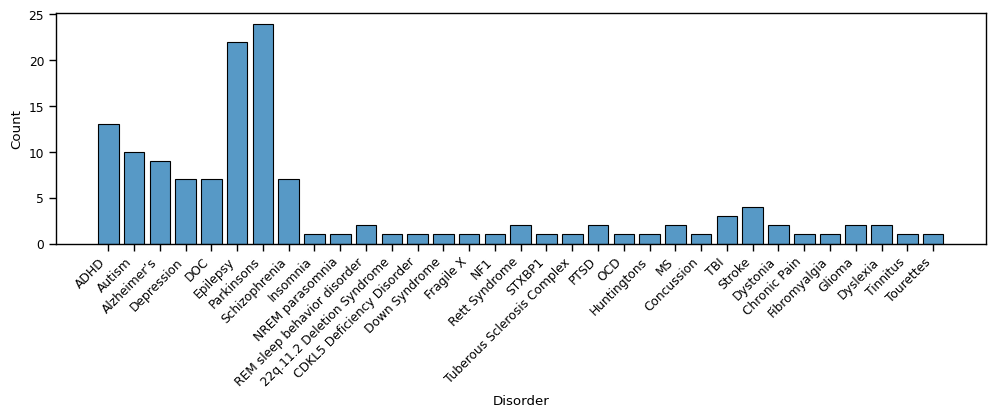

In [43]:
plot_hist(df, 'Disorder', figsize=(12, 3))

## Publication Years

In [14]:
years = np.array(df['Year'].values).astype('int')

In [15]:
months = df['Month'].values
months[months == '-'] = 1
months = np.array(months, dtype=int)

In [16]:
second_half = months > 6

In [99]:
half_years = years + second_half * 0.5

In [100]:
half_year_counter = Counter(half_years)

In [101]:
year_counts = Counter(years)
#year_counts

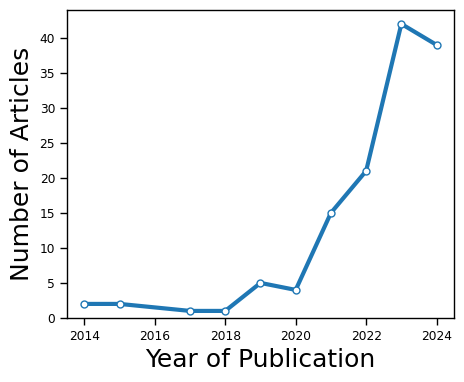

In [102]:
plot_years(year_counts, year_range=[2014, 2024], figsize=(5, 4))

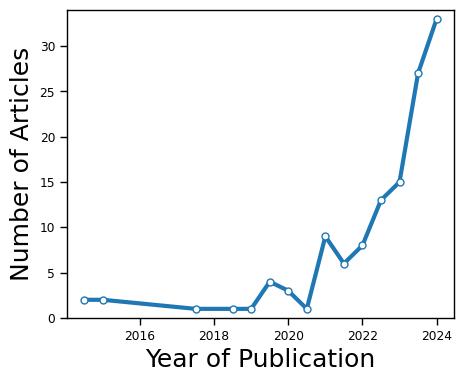

In [103]:
plot_years(half_year_counter, year_range=[2014, 2024], figsize=[5, 4])

## Data Modality

In [104]:
# Set order of the methods for plotting
df['Data'] = pd.Categorical(\
    df['Data'], ['EEG','MEG','DBS','iEEG', 'RNS'])

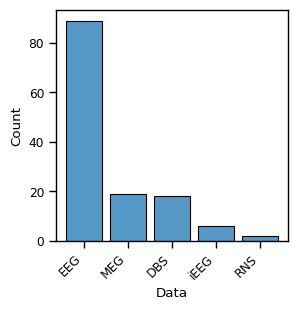

In [105]:
plot_hist(df, 'Data')

## Fit Methods

In [106]:
fit_methods = Counter(df['Fit Method'].values)

In [107]:
# Set order of the methods for plotting
df['Fit Method'] = pd.Categorical(\
    df['Fit Method'], ['specparam','regression','irasa','Colombo', 'eBOSC', 'Bódizs', 'unclear'])

In [108]:
fit_methods

Counter({nan: 18,
         'specparam': 92,
         'regression': 26,
         'irasa': 6,
         'Colombo': 7,
         'unclear': 2,
         'Bódizs': 1,
         'eBOSC': 2})

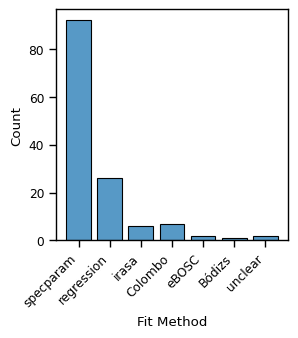

In [109]:
plot_hist(df, 'Fit Method')

## Analyzed Data

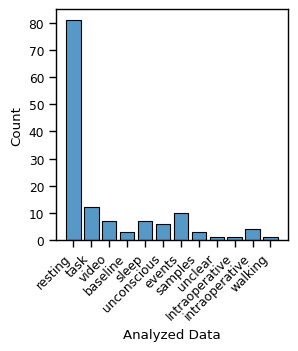

In [110]:
plot_hist(df, 'Analyzed Data')

## Interpretation

In [111]:
# Set order of the methods for plotting
df['Interpretation'] = pd.Categorical(\
    df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
                           'synchronicity', 'complexity', 'criticality', 
                           'timescale', 'integration', 'neurotransmission', 'unclear'])

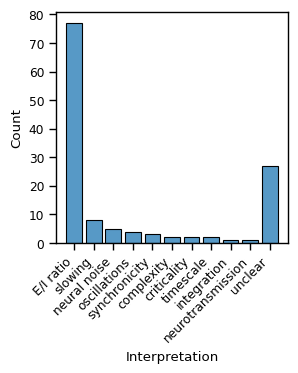

In [112]:
plot_hist(df, 'Interpretation')

In [113]:
def min_count(df, column, min_value):
    return df.groupby(column).filter(lambda x : len(x) > min_value)

In [114]:
#dft

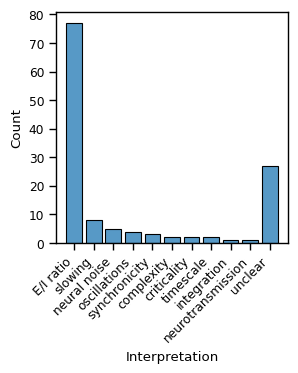

In [115]:
plot_hist(df, 'Interpretation')

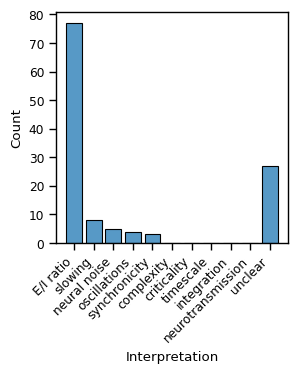

In [116]:
plot_hist(min_count(df, 'Interpretation', 2), 'Interpretation')